Dogecoin trading volume, used to better understand the trading popularity of Dogecoin

[*********************100%***********************]  1 of 1 completed


Price      Adj Close     Close      High       Low      Open    Volume
Ticker      DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD  DOGE-USD
Date                                                                  
2020-01-01  0.002033  0.002033  0.002052  0.002021  0.002028  51180941
2020-01-02  0.002009  0.002009  0.002110  0.001983  0.002034  65071106
2020-01-03  0.002145  0.002145  0.002177  0.001991  0.002008  62619988
2020-01-04  0.002241  0.002241  0.002490  0.002050  0.002144  94227582
2020-01-05  0.002419  0.002419  0.002491  0.002117  0.002240  52631740
Price      Ticker  
Adj Close  DOGE-USD    0
Close      DOGE-USD    0
High       DOGE-USD    0
Low        DOGE-USD    0
Open       DOGE-USD    0
Volume     DOGE-USD    0
dtype: int64


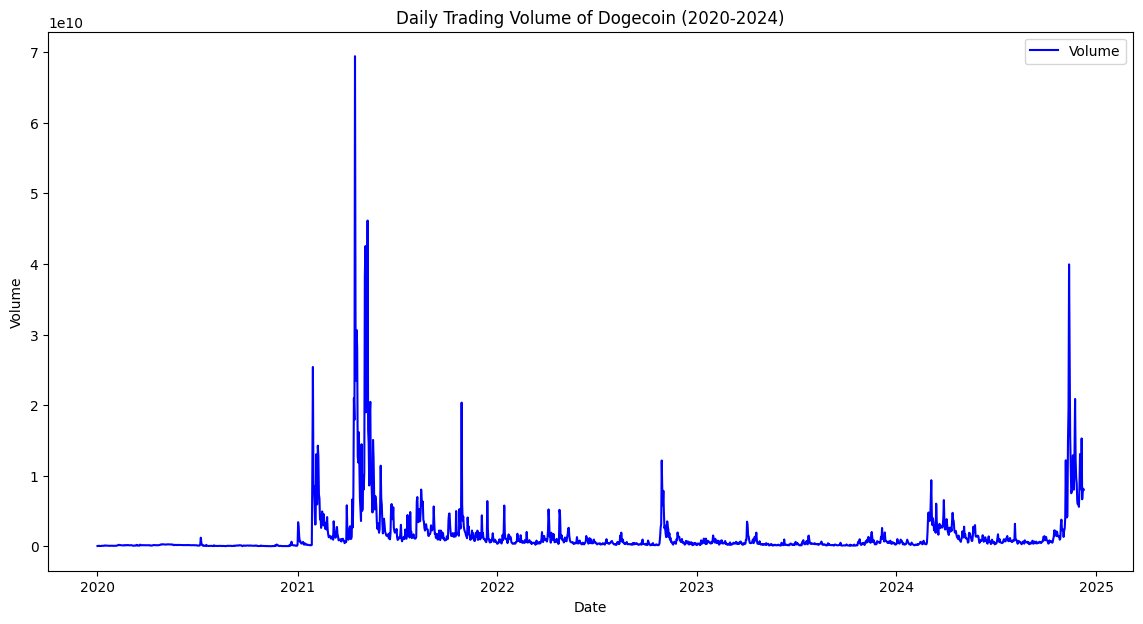

In [2]:
!pip install yfinance
import yfinance as yf
import pandas as pd

# Define the code for Dogecoin
ticker = 'DOGE-USD'

# Download daily data from January 1, 2020, to November 15, 2024
data = yf.download(ticker, start='2020-01-01', end='2024-12-10', interval='1d')

# View the first few rows of data
print(data.head())
# Check for missing values
print(data.isnull().sum())

# Drop rows containing missing values
data = data.dropna()
import matplotlib.pyplot as plt

# Set the chart size
plt.figure(figsize=(14, 7))

# Plot the volume curve
plt.plot(data.index, data['Volume'], label='Volume', color='blue')

# Set the title and labels
plt.title('Daily Trading Volume of Dogecoin (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

# Display the chart
plt.show()



Dogecoin Price Prediction

In [3]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Use only the 'Close' column for prediction
df = data[['Close']]

# Check for missing values and drop them
df = df.dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Define the length of the training data
train_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create the training dataset
train_data = scaled_data[0:int(train_data_len), :]

# Split data into features (X) and labels (Y)
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # Use the previous 60 data points as input
    y_train.append(train_data[i, 0])       # Predict the next data point

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to meet LSTM input requirements
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


Train model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # First LSTM layer with return_sequences=True
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer without returning sequences
model.add(Dense(units=25))  # Dense layer with 25 neurons
model.add(Dense(units=1))   # Output layer with 1 neuron

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use Adam optimizer and mean squared error loss

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)  # Train the model with batch size 1 and 1 epoch


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1384/1384 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - loss: 0.0035


Make predictions

In [5]:
# Create the test dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = df[train_data_len:].values  # Actual values for comparison

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])  # Use the previous 60 data points as input

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Reshape the data to meet LSTM input requirements
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions to get values in the original scale
predictions = scaler.inverse_transform(predictions)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


<ipython-input-6-4911c18fadd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


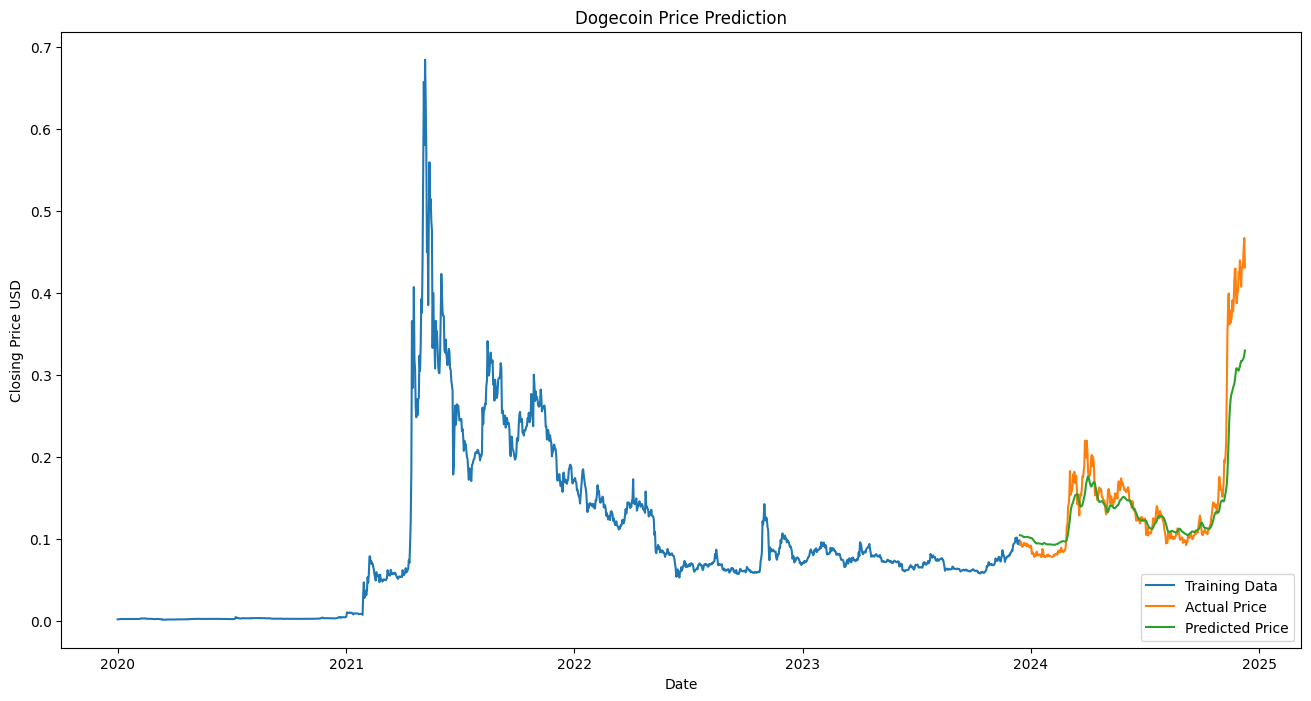

In [6]:
import matplotlib.pyplot as plt

# Get the 'Close' column of the training dataset
train = df[:train_data_len]
valid = df[train_data_len:]
valid['Predictions'] = predictions

# Plot the data
plt.figure(figsize=(16,8))
plt.title('Dogecoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Training Data', 'Actual Price', 'Predicted Price'], loc='lower right')
plt.show()


In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Assume `data` is a DataFrame containing price data; only the 'Close' column is used
df = data[['Close']]

# Check for missing values and drop them
df = df.dropna()

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Define the length of the training data
train_data_len = int(np.ceil(len(scaled_data) * 0.8))

# Create the training dataset
train_data = scaled_data[0:int(train_data_len), :]

# Split the data into features (X) and labels (Y)
x_train = []
y_train = []

# Use the past 60 days of data to predict the next 7 days
for i in range(120, len(train_data) - 6):
    x_train.append(train_data[i-60:i, 0])  # Past 60 days as features
    y_train.append(train_data[i:i+7, 0])  # Next 7 days as labels

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data to meet LSTM input requirements
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))  # First LSTM layer
model.add(LSTM(units=50, return_sequences=False))  # Second LSTM layer
model.add(Dense(units=25))  # Dense layer with 25 neurons
model.add(Dense(units=7))   # Output layer with 7 neurons for 7-day predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the test dataset
test_data = scaled_data[train_data_len - 60:, :]

# Create x_test and y_test
x_test = []
y_test = []

# Generate test data for the next 7 days
for i in range(60, len(test_data) - 6):
    x_test.append(test_data[i-60:i, 0])  # Past 60 days as input
    y_test.append(test_data[i:i+7, 0])  # Next 7 days as actual values

# Convert t


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1318/1318 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - loss: 0.0050


Simulate the trading performance of contracts based on different leverage multiples, calculate daily returns, check whether liquidation is triggered, and find the optimal leverage multiple

In [8]:
import pandas as pd
import numpy as np

# Calculate the daily percentage change in 'Close' prices
valid['Price Change %'] = valid['Close'].pct_change() * 100  # Multiply by 100 to get the percentage

# Fill any NaN values that may result from the pct_change() method
valid['Price Change %'].fillna(0, inplace=True)

# Assuming the rest of your code follows here
# Initialize initial capital
initial_investment = 1000  # Initial principal, e.g., 1000 USD
leverage_options = [2, 5, 10, 15, 20]  # Different leverage multipliers
results = {}

# Iterate over different leverage options
for leverage in leverage_options:
    # Reset initial settings
    contract_balance = initial_investment  # Initial margin
    entry_price = valid['Predictions'].iloc[0]  # Assume the first predicted price as the entry price
    liquidation_threshold = entry_price * (1 - 1 / leverage)  # Dynamically set liquidation price
    profits = []
    liquidation = False

    # Simulate daily returns
    for i, change in enumerate(valid['Price Change %'][1:]):
        # Calculate daily return
        daily_return = contract_balance * (change / 100) * leverage
        contract_balance += daily_return

        # Check for liquidation
        if valid['Predictions'].iloc[i + 1] <= liquidation_threshold:
            print(f"Liquidation at {leverage}x leverage! Day {i + 1}, price reached {valid['Predictions'].iloc[i + 1]:.2f} USD")
            liquidation = True
            break  # Exit loop after liquidation

        # Store daily profit
        profits.append(daily_return)

    # Record results
    if not liquidation:
        print(f"No liquidation triggered at {leverage}x leverage.")
        print(f"Final contract balance: {contract_balance:.2f} USD")
    total_profit = sum(profits)
    results[leverage] = {
        'Total Contract Profit': total_profit,
        'Final Contract Balance': contract_balance,
        'Initial Capital': initial_investment,
        'Profit Percentage': (total_profit / initial_investment) * 100,
        'Liquidation': liquidation
    }

# Output final results and select the optimal leverage
optimal_leverage = None
highest_balance = 0

print("\nResults for each leverage:")
for leverage, result in results.items():
    print(f"Results for {leverage}x leverage:")
    for key, value in result.items():
        print(f"{key}: {value:.2f} USD" if isinstance(value, float) else f"{key}: {value}")
    if not result['Liquidation'] and result['Final Contract Balance'] > highest_balance:
        highest_balance = result['Final Contract Balance']
        optimal_leverage = leverage

print(f"\nThe optimal leverage is: {optimal_leverage}x, with a final balance of: {highest_balance:.2f} USD")


<ipython-input-8-b0f94902631f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Price Change %'].fillna(0, inplace=True)


No liquidation triggered at 2x leverage.
Final contract balance: 8368.97 USD
No liquidation triggered at 5x leverage.
Final contract balance: 120.23 USD
Liquidation at 10x leverage! Day 34, price reached 0.09 USD
Liquidation at 15x leverage! Day 23, price reached 0.10 USD
Liquidation at 20x leverage! Day 21, price reached 0.10 USD

Results for each leverage:
Results for 2x leverage:
Total Contract Profit: 7368.97 USD
Final Contract Balance: 8368.97 USD
Initial Capital: 1000
Profit Percentage: 736.90 USD
Liquidation: False
Results for 5x leverage:
Total Contract Profit: -879.77 USD
Final Contract Balance: 120.23 USD
Initial Capital: 1000
Profit Percentage: -87.98 USD
Liquidation: False
Results for 10x leverage:
Total Contract Profit: -1001.12 USD
Final Contract Balance: -0.77 USD
Initial Capital: 1000
Profit Percentage: -100.11 USD
Liquidation: True
Results for 15x leverage:
Total Contract Profit: -1076.42 USD
Final Contract Balance: -41.76 USD
Initial Capital: 1000
Profit Percentage: -

Simulate the risk of leveraged contract trading, use hourly price data of DOGE/USD, calculate whether to trigger liquidation, and record trading performance.

In [10]:
import yfinance as yf
import pandas as pd

# Set initial funds and leverage
initial_investment = 3000  # Investment amount per entry
leverage = 5
results = []

# Fetch DOGE hourly price data
ticker = 'DOGE-USD'
data = yf.download(ticker, start='2024-11-07', end='2024-12-10', interval='1h')

# Convert time to New Zealand time (UTC+13)
data.index = data.index.tz_convert('Pacific/Auckland')

# Iterate through each hour, simulating contract entry at hourly high and calculating liquidation risk
for i in range(len(data) - 1):
    entry_price = float(data['High'].iloc[i])  # Assume buying at the hourly high price
    liquidation_threshold = entry_price * (1 - 1 / leverage)  # Calculate liquidation price
    contract_balance = initial_investment  # Investment amount per entry

    # Check the following hours using hourly low to see if liquidation occurs
    liquidation = False
    for j in range(i + 1, len(data)):
        future_low_price = float(data['Low'].iloc[j])  # Use hourly low to check for liquidation
        if future_low_price <= liquidation_threshold:
            results.append({
                'Entry Time': data.index[i],
                'Entry Price': entry_price,
                'Liquidation Time': data.index[j],
                'Liquidation Price': liquidation_threshold,
                'Actual Price': future_low_price,
                'Liquidated': True
            })
            liquidation = True
            break  # Exit loop on liquidation
        else:
            # If not liquidated, calculate hourly balance change
            price_change = (float(data['Close'].iloc[j]) - entry_price) / entry_price * leverage * initial_investment
            contract_balance += price_change

    # If no liquidation, record final balance
    if not liquidation:
        results.append({
            'Entry Time': data.index[i],
            'Entry Price': entry_price,
            'Final Balance': contract_balance,
            'Liquidated': False
        })

# Convert results to DataFrame and filter for liquidation events
results_df = pd.DataFrame(results)
results_df['Entry Time'] = results_df['Entry Time'].dt.tz_convert('Pacific/Auckland')
results_df['Liquidation Time'] = results_df['Liquidation Time'].dt.tz_convert('Pacific/Auckland')

# Filter for liquidation records
liquidation_df = results_df[results_df['Liquidated'] == True]
print("Liquidation Records (New Zealand Time):")
print(liquidation_df)


[*********************100%***********************]  1 of 1 completed
<ipython-input-10-0c3c89253a19>:18: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  entry_price = float(data['High'].iloc[i])  # Assume buying at the hourly high price
<ipython-input-10-0c3c89253a19>:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  future_low_price = float(data['Low'].iloc[j])  # Use hourly low to check for liquidation
<ipython-input-10-0c3c89253a19>:39: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  price_change = (float(data['Close'].iloc[j]) - entry_price) / entry_price * leverage * initial_investment


Liquidation Records (New Zealand Time):
                   Entry Time  Entry Price  Final Balance  Liquidated  \
128 2024-11-12 21:00:00+13:00     0.428985            NaN        True   
129 2024-11-12 22:00:00+13:00     0.435586            NaN        True   
158 2024-11-14 03:00:00+13:00     0.431624            NaN        True   
388 2024-11-23 17:00:00+13:00     0.474690            NaN        True   
389 2024-11-23 18:00:00+13:00     0.464576            NaN        True   
390 2024-11-23 19:00:00+13:00     0.468809            NaN        True   
391 2024-11-23 20:00:00+13:00     0.468345            NaN        True   
392 2024-11-23 21:00:00+13:00     0.461546            NaN        True   
393 2024-11-23 22:00:00+13:00     0.467054            NaN        True   
394 2024-11-23 23:00:00+13:00     0.477060            NaN        True   
395 2024-11-24 00:00:00+13:00     0.477323            NaN        True   
396 2024-11-24 01:00:00+13:00     0.474424            NaN        True   
397 2024-11